In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from scipy import stats
import re


df = pd.read_csv("C:/Users/user/Desktop/n_a/data.csv") 


print("Dataset info:")
print(df.info())




Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            6696 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-n

In [158]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),NaN,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes


In [ ]:
df['tenure_group'] = df['tenure'].apply(lambda x: 'Yangi' if x < 12 else 'Eski')


print(df.groupby('tenure_group')['Churn'].value_counts(normalize=True))


tenure_group  Churn
Eski          No       0.817911
              Yes      0.182089
Yangi         No       0.525660
              Yes      0.474340
Name: proportion, dtype: float64


In [160]:
print(df.groupby('InternetService')['Churn'].value_counts(normalize=True))


InternetService  Churn
DSL              No       0.810409
                 Yes      0.189591
Fiber optic      No       0.581072
                 Yes      0.418928
No               No       0.925950
                 Yes      0.074050
Name: proportion, dtype: float64


In [161]:
print(df.groupby('gender')['Churn'].value_counts(normalize=True))


gender  Churn
Female  No       0.730791
        Yes      0.269209
Male    No       0.738397
        Yes      0.261603
Name: proportion, dtype: float64


In [ ]:
from scipy.stats import chi2_contingency


table1 = pd.crosstab(df['tenure_group'], df['Churn'])
chi2, p, dof, expected = chi2_contingency(table1)
print(f"Gipoteza 1: Chi2={chi2:.2f}, p-value={p:.4f}")


table2 = pd.crosstab(df['InternetService'], df['Churn'])
chi2, p, dof, expected = chi2_contingency(table2)
print(f"Gipoteza 2: Chi2={chi2:.2f}, p-value={p:.4f}")


table3 = pd.crosstab(df['gender'], df['Churn'])
chi2, p, dof, expected = chi2_contingency(table3)
print(f"Gipoteza 3: Chi2={chi2:.2f}, p-value={p:.4f}")


Gipoteza 1: Chi2=627.24, p-value=0.0000
Gipoteza 2: Chi2=732.31, p-value=0.0000
Gipoteza 3: Chi2=0.48, p-value=0.4866


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)


In [1]:
# plt.figure(figsize=(8, 5))
# sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30)
# plt.title('📊 tenure (xizmat muddati) bo‘yicha Churn taqsimoti')
# plt.xlabel('Xizmat muddati (oylarda)')
# plt.ylabel('Mijozlar soni')
# plt.show()


Yangi mijozlar (tenure < 12) orasida Churn yuqori.

Uzoq muddat qolgan mijozlar ketish ehtimoli kamroq.

In [165]:
# plt.figure(figsize=(8, 5))
# sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
# plt.title('💰 MonthlyCharges va Churn o‘rtasidagi bog‘liqlik')
# plt.xlabel('Churn')
# plt.ylabel('Oylik to‘lov')
# plt.show()


Ketayotgan mijozlarning oylik to‘lovi yuqoriroq.

Yuqori narxli xizmatlar ko‘proq ketishga olib keladi.

In [166]:
# plt.figure(figsize=(8, 5))
# sns.countplot(data=df, x='Contract', hue='Churn')
# plt.title('📄 Contract turi bo‘yicha Churn taqsimoti')
# plt.xlabel('Shartnoma turi')
# plt.ylabel('Mijozlar soni')
# plt.show()


Oyma-oy shartnoma qilganlar orasida Churn yuqori.

1 yillik va 2 yillik shartnoma qilganlar kamroq ketmoqda.

In [167]:
df.isnull().sum()


customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure              347
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges      347
TotalCharges        345
Churn                 0
tenure_group          0
dtype: int64

In [ ]:
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


df['tenure'].fillna(df['tenure'].median(), inplace=True)
df['MonthlyCharges'].fillna(df['MonthlyCharges'].median(), inplace=True)
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [ ]:

for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col} ustuni:", df[col].unique())


customerID ustuni: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ustuni: ['Female' 'Male']
Partner ustuni: ['Yes' 'No']
Dependents ustuni: ['No' 'Yes']
PhoneService ustuni: ['No' 'Yes']
MultipleLines ustuni: ['No phone service' 'No' 'Yes']
InternetService ustuni: ['DSL' 'Fiber optic' 'No']
OnlineSecurity ustuni: ['No' 'Yes' 'No internet service']
OnlineBackup ustuni: ['Yes' 'No' 'No internet service']
DeviceProtection ustuni: ['No' 'Yes' 'No internet service']
TechSupport ustuni: ['No' 'Yes' 'No internet service']
StreamingTV ustuni: ['No' 'Yes' 'No internet service']
StreamingMovies ustuni: ['No' 'Yes' 'No internet service']
Contract ustuni: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ustuni: ['Yes' 'No']
PaymentMethod ustuni: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ustuni: ['No' 'Yes']
tenure_group ustuni: ['Yangi' 'Eski']


In [170]:
df = df[df['TotalCharges'] <= 10000]


In [171]:
df = df[df['tenure'] >= 0]


In [ ]:

df['Churn'] = df['Churn'].astype(str).str.strip()


df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


print(df['Churn'].value_counts())


Churn
0    5076
1    1828
Name: count, dtype: int64


In [173]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.35,29.85,0,Yangi
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,Eski
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,Yangi
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),70.35,1840.75,0,Eski
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,Yangi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,Eski
7039,2234-XADUH,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),70.35,1425.20,0,Eski
7040,4801-JZAZL,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,Yangi
7041,8361-LTMKD,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,1425.20,1,Yangi


 Qachon olib tashlaymiz, qachon to‘ldiramiz?
Holat	Tavsiya
NaN juda kam bo‘lsa (masalan, <5%)	👉 Olib tashlash mumkin — bu analizga ta’sir qilmaydi
NaN juda ko‘p bo‘lsa (10% dan ortiq)	👉 To‘ldirish kerak, chunki ko‘p ma’lumot yo‘qoladi
Muhim ustunlarda NaN bo‘lsa (target yoki asosiy xususiyat)	⚠️ Diqqat bilan qarash kerak, noto‘g‘ri to‘ldirish modelni buzadi

🔧 Bizning holatimizda:
MonthlyCharges va tenure — model uchun juda muhim ustunlar.
Agar siz:

to‘g‘ri statistik o‘rta qiymat yoki medianadan foydalansangiz — to‘ldirish mumkin

In [ ]:

cat_cols = df.select_dtypes(include='object').columns.tolist()


cat_cols = [col for col in cat_cols if col not in ['customerID', 'tenure_group']]

print("Kategorik ustunlar:", cat_cols)


Kategorik ustunlar: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [ ]:
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)


print("One-Hot Encodingdan keyingi ustunlar soni:", df_encoded.shape[1])


One-Hot Encodingdan keyingi ustunlar soni: 33


In [ ]:
from sklearn.preprocessing import StandardScaler


num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']


scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])


df_encoded[num_cols].describe()


,tenure,MonthlyCharges,TotalCharges
count,6.904000e+03,6.904000e+03,6.904000e+03
mean,-1.150104e-16,-2.418562e-16,1.373949e-16
std,1.000072e+00,1.000072e+00,1.000072e+00
min,-1.345521e+00,-1.615261e+00,-1.008328e+00
25%,-9.273964e-01,-7.562625e-01,-8.065649e-01
50%,-1.747718e-01,1.784789e-01,-3.674981e-01
75%,9.123526e-01,8.188542e-01,6.047277e-01
max,1.664977e+00,1.844832e+00,2.940357e+00


In [ ]:

X = df.drop(['Churn', 'customerID', 'tenure_group'], axis=1)
y = df['Churn']


X = pd.get_dummies(X)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X[['tenure', 'MonthlyCharges', 'TotalCharges']])


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [181]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
y_proba_log = log_model.predict_proba(X_test)[:,1]

print("🔹 Logistic Regression natijalari:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("F1 score:", f1_score(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_log))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_log))


🔹 Logistic Regression natijalari:
Accuracy: 0.7972483707458363
F1 score: 0.5882352941176471
ROC-AUC: 0.8411693450698537
Confusion matrix:
 [[901 114]
 [166 200]]


🔹 Random Forest natijalari:
Accuracy: 0.776249094858798
F1 Score: 0.5339366515837105
ROC-AUC: 0.8175697865353038
Confusion Matrix:
 [[895 120]
 [189 177]]


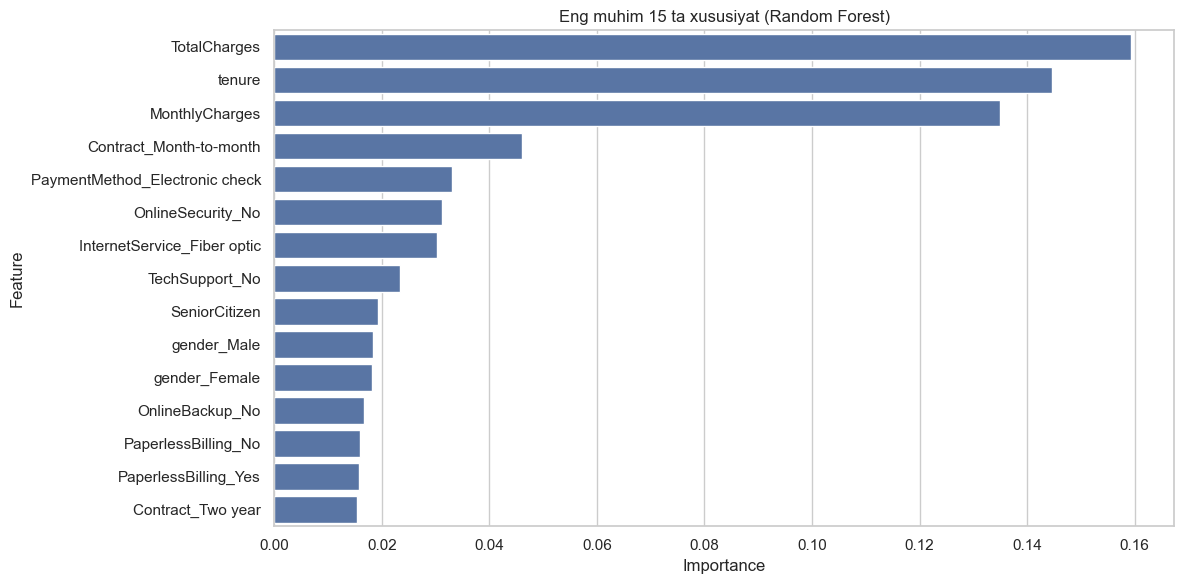

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]


print("🔹 Random Forest natijalari:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


importances = rf_model.feature_importances_
features = X_train.columns


feature_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df.head(15))
plt.title("Eng muhim 15 ta xususiyat (Random Forest)")
plt.tight_layout()
plt.show()


In [ ]:
import joblib


joblib.dump(rf_model, "churn_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

Gipotezalar tahlili (Chi-squared testlar asosida)
Oldingi statistik testlar natijasi:
Gipoteza	Chi2 qiymati	p-value	Holat
1	Yangi mijozlar ko‘proq ketadimi?	627.24	0.0000	✅ Tasdiqlandi
2	Fiber optic foydalanuvchilar ko‘proq ketadimi?	732.31	0.0000	✅ Tasdiqlandi
3	Ayollar kamroq ketadimi?	0.48	0.4866	❌ Rad etildi

In [ ]:
from scipy.stats import chi2_contingency


crosstab1 = pd.crosstab(df['tenure_group'], df['Churn'])
chi1, p1, _, _ = chi2_contingency(crosstab1)


crosstab2 = pd.crosstab(df['InternetService'], df['Churn'])
chi2, p2, _, _ = chi2_contingency(crosstab2)

crosstab3 = pd.crosstab(df['gender'], df['Churn'])
chi3, p3, _, _ = chi2_contingency(crosstab3)


print("📊 Gipoteza 1 (tenure_group): Chi2=%.2f, p-value=%.4f" % (chi1, p1))
print("📊 Gipoteza 2 (InternetService): Chi2=%.2f, p-value=%.4f" % (chi2, p2))
print("📊 Gipoteza 3 (gender): Chi2=%.2f, p-value=%.4f" % (chi3, p3))


📊 Gipoteza 1 (tenure_group): Chi2=623.36, p-value=0.0000
📊 Gipoteza 2 (InternetService): Chi2=723.62, p-value=0.0000
📊 Gipoteza 3 (gender): Chi2=0.33, p-value=0.5645
